# Mini-Batch Gradient Descent Algorithm

## Objetivo
Implementar y analizar el algoritmo Mini-Batch Gradient Descent para problemas de regresi√≥n lineal, comparando su rendimiento con Batch Gradient Descent y Stochastic Gradient Descent.

## Diferencias entre variantes de Gradient Descent:

### 1. **Batch Gradient Descent**
- **Descripci√≥n**: Utiliza todo el conjunto de datos para calcular el gradiente en cada iteraci√≥n
- **Ventajas**: 
  - Convergencia suave y estable
  - Garantiza encontrar el m√≠nimo global para funciones convexas
- **Desventajas**: 
  - Muy lento para datasets grandes
  - Requiere mucha memoria
  - Puede quedarse atascado en m√≠nimos locales

### 2. **Stochastic Gradient Descent (SGD)**
- **Descripci√≥n**: Utiliza una sola muestra aleatoria para calcular el gradiente
- **Ventajas**: 
  - Muy r√°pido para datasets grandes
  - Puede escapar de m√≠nimos locales debido al ruido
  - Converge r√°pidamente
- **Desventajas**: 
  - Convergencia ruidosa e inestable
  - Nunca converge completamente al m√≠nimo

### 3. **Mini-Batch Gradient Descent**
- **Descripci√≥n**: Utiliza un subconjunto peque√±o (mini-batch) de muestras para calcular el gradiente
- **Ventajas**: 
  - Balance entre velocidad y estabilidad
  - Aprovecha vectorizaci√≥n para eficiencia computacional
  - Convergencia m√°s suave que SGD
- **Desventajas**: 
  - Requiere ajustar el tama√±o del batch
  - Puede requerir m√°s iteraciones que Batch GD

In [42]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

Forma de X: (1000, 1)
Forma de y: (1000, 1)
Forma de X_b: (1000, 2)


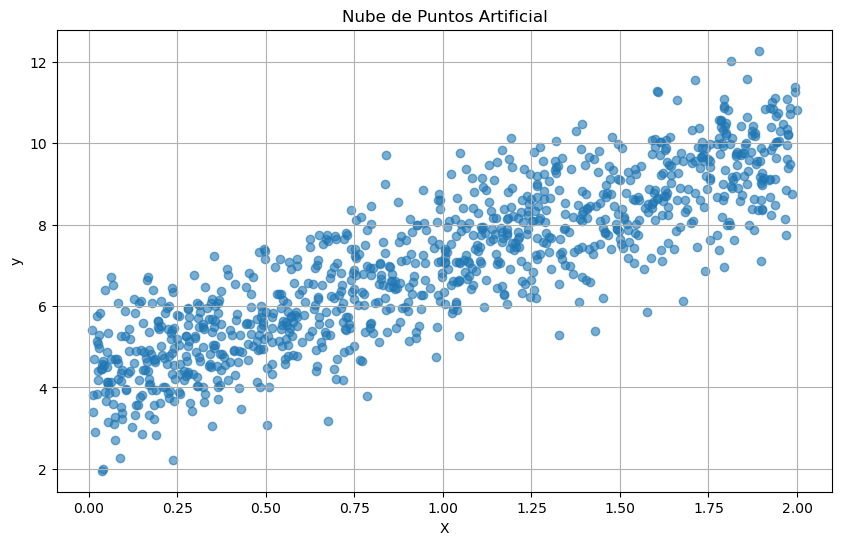

In [43]:
# 1. Generaci√≥n de datos artificiales (nube de puntos)
np.random.seed(42)
m = 1000  # n√∫mero de muestras
X = 2 * np.random.rand(m, 1)  # feature
y = 4 + 3 * X + np.random.randn(m, 1)  # target con ruido

# A√±adir columna de 1s para el t√©rmino de sesgo (bias)
X_b = np.c_[np.ones((m, 1)), X]  # forma (m, 2)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Forma de X_b: {X_b.shape}")

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nube de Puntos Artificial')
plt.grid(True)
plt.show()

In [44]:
# 2. Funci√≥n de costo (Mean Squared Error)
def compute_cost(X, y, theta):
    """
    Calcula el costo usando Mean Squared Error
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, theta, batch_size=None):
    """
    Calcula el gradiente para la funci√≥n de costo
    """
    m = len(y) if batch_size is None else batch_size
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

In [45]:
# 3. Implementaci√≥n de Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=32, random_state=42):
    """
    Implementa Mini-Batch Gradient Descent
    
    Par√°metros:
    - X: matriz de features con columna de bias
    - y: vector target
    - learning_rate: tasa de aprendizaje
    - n_iterations: n√∫mero de √©pocas
    - batch_size: tama√±o del mini-batch
    - random_state: semilla para reproducibilidad
    
    Retorna:
    - theta: par√°metros optimizados
    - cost_history: historial de costos por √©poca
    - time_elapsed: tiempo de ejecuci√≥n
    """
    np.random.seed(random_state)
    m, n = X.shape
    theta = np.random.randn(n, 1)  # inicializaci√≥n aleatoria
    cost_history = []
    
    start_time = time.time()
    
    for epoch in range(n_iterations):
        # Barajar los datos al inicio de cada √©poca
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Procesar mini-batches
        for i in range(0, m, batch_size):
            # Obtener mini-batch
            end_idx = min(i + batch_size, m)
            X_batch = X_shuffled[i:end_idx]
            y_batch = y_shuffled[i:end_idx]
            
            # Calcular gradiente para el mini-batch
            gradient = compute_gradient(X_batch, y_batch, theta, len(X_batch))
            
            # Actualizar par√°metros
            theta = theta - learning_rate * gradient
        
        # Calcular y almacenar el costo de toda la √©poca
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    time_elapsed = time.time() - start_time
    
    return theta, cost_history, time_elapsed

# Funci√≥n para Batch Gradient Descent (para comparaci√≥n)
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, random_state=42):
    """
    Implementa Batch Gradient Descent para comparaci√≥n
    """
    np.random.seed(random_state)
    m, n = X.shape
    theta = np.random.randn(n, 1)
    cost_history = []
    
    start_time = time.time()
    
    for i in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    time_elapsed = time.time() - start_time
    
    return theta, cost_history, time_elapsed

# Funci√≥n para Stochastic Gradient Descent (para comparaci√≥n)  
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, random_state=42):
    """
    Implementa Stochastic Gradient Descent para comparaci√≥n
    """
    np.random.seed(random_state)
    m, n = X.shape
    theta = np.random.randn(n, 1)
    cost_history = []
    
    start_time = time.time()
    
    for epoch in range(n_iterations):
        indices = np.random.permutation(m)
        for i in indices:
            X_i = X[i:i+1]
            y_i = y[i:i+1]
            gradient = compute_gradient(X_i, y_i, theta, 1)
            theta = theta - learning_rate * gradient
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    time_elapsed = time.time() - start_time
    
    return theta, cost_history, time_elapsed

üöÄ Entrenando algoritmos de Gradient Descent...
üìä Entrenando Mini-Batch Gradient Descent...
üìä Entrenando Batch Gradient Descent...
üìä Entrenando Stochastic Gradient Descent...
üìä Entrenando Batch Gradient Descent...
üìä Entrenando Stochastic Gradient Descent...

üìã Resultados del entrenamiento:
Mini-Batch GD - Par√°metros finales: Œ∏‚ÇÄ=4.1751, Œ∏‚ÇÅ=2.9265
Batch GD      - Par√°metros finales: Œ∏‚ÇÄ=3.3055, Œ∏‚ÇÅ=2.9561
Stochastic GD - Par√°metros finales: Œ∏‚ÇÄ=4.1847, Œ∏‚ÇÅ=2.9782

Tiempos de ejecuci√≥n:
Mini-Batch GD: 0.0361 segundos
Batch GD:      0.0097 segundos
Stochastic GD: 0.5026 segundos

üéØ Par√°metros reales: Œ∏‚ÇÄ=4.0000, Œ∏‚ÇÅ=3.0000

üìã Resultados del entrenamiento:
Mini-Batch GD - Par√°metros finales: Œ∏‚ÇÄ=4.1751, Œ∏‚ÇÅ=2.9265
Batch GD      - Par√°metros finales: Œ∏‚ÇÄ=3.3055, Œ∏‚ÇÅ=2.9561
Stochastic GD - Par√°metros finales: Œ∏‚ÇÄ=4.1847, Œ∏‚ÇÅ=2.9782

Tiempos de ejecuci√≥n:
Mini-Batch GD: 0.0361 segundos
Batch GD:      0.0097 segundos
Stochastic GD

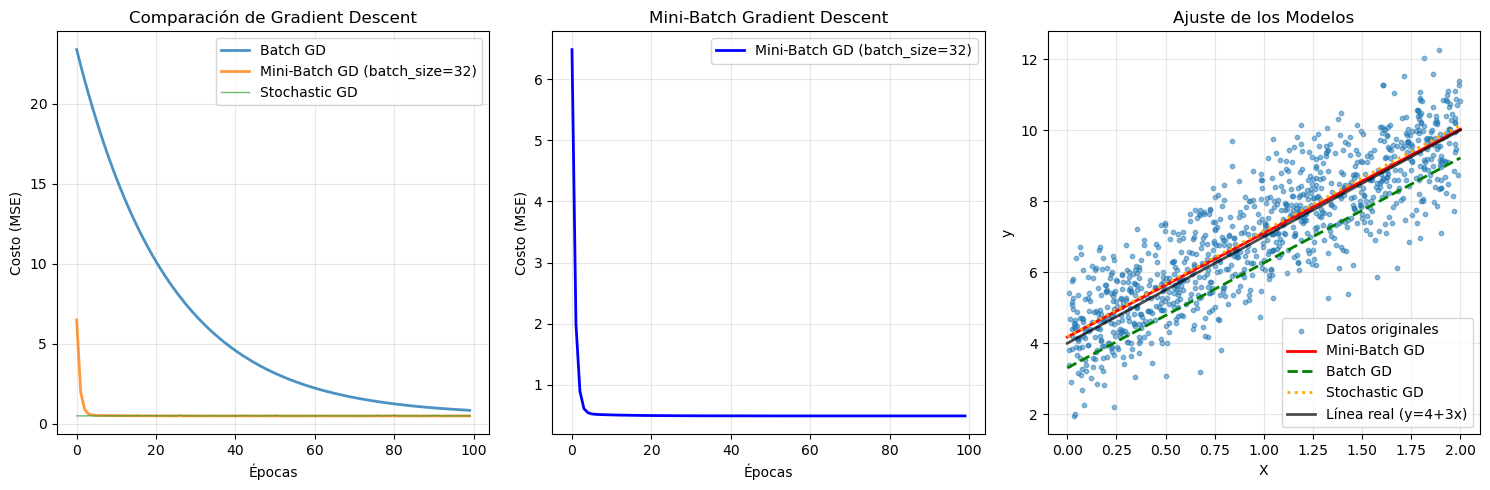

In [46]:
# 4. Entrenamiento y comparaci√≥n de algoritmos
print("üöÄ Entrenando algoritmos de Gradient Descent...")
print("=" * 60)

# Hiperpar√°metros
learning_rate = 0.01
n_iterations = 100
batch_size = 32

# Entrenar Mini-Batch Gradient Descent
print("üìä Entrenando Mini-Batch Gradient Descent...")
theta_mb, cost_history_mb, time_mb = mini_batch_gradient_descent(
    X_b, y, learning_rate, n_iterations, batch_size
)

# Entrenar Batch Gradient Descent para comparaci√≥n
print("üìä Entrenando Batch Gradient Descent...")
theta_batch, cost_history_batch, time_batch = batch_gradient_descent(
    X_b, y, learning_rate, n_iterations
)

# Entrenar Stochastic Gradient Descent para comparaci√≥n
print("üìä Entrenando Stochastic Gradient Descent...")
theta_sgd, cost_history_sgd, time_sgd = stochastic_gradient_descent(
    X_b, y, learning_rate, n_iterations
)

print("\nüìã Resultados del entrenamiento:")
print(f"Mini-Batch GD - Par√°metros finales: Œ∏‚ÇÄ={theta_mb[0][0]:.4f}, Œ∏‚ÇÅ={theta_mb[1][0]:.4f}")
print(f"Batch GD      - Par√°metros finales: Œ∏‚ÇÄ={theta_batch[0][0]:.4f}, Œ∏‚ÇÅ={theta_batch[1][0]:.4f}")
print(f"Stochastic GD - Par√°metros finales: Œ∏‚ÇÄ={theta_sgd[0][0]:.4f}, Œ∏‚ÇÅ={theta_sgd[1][0]:.4f}")
print(f"\nTiempos de ejecuci√≥n:")
print(f"Mini-Batch GD: {time_mb:.4f} segundos")
print(f"Batch GD:      {time_batch:.4f} segundos") 
print(f"Stochastic GD: {time_sgd:.4f} segundos")

# Par√°metros reales (conocidos): y = 4 + 3*X
print(f"\nüéØ Par√°metros reales: Œ∏‚ÇÄ=4.0000, Œ∏‚ÇÅ=3.0000")

# 5. Visualizaci√≥n: Funci√≥n de costo vs iteraciones
plt.figure(figsize=(15, 5))

# Subplot 1: Comparaci√≥n de todas las variantes
plt.subplot(1, 3, 1)
plt.plot(cost_history_batch, label='Batch GD', linewidth=2, alpha=0.8)
plt.plot(cost_history_mb, label=f'Mini-Batch GD (batch_size={batch_size})', linewidth=2, alpha=0.8)
plt.plot(cost_history_sgd, label='Stochastic GD', linewidth=1, alpha=0.7)
plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Comparaci√≥n de Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Focus en Mini-Batch GD
plt.subplot(1, 3, 2)
plt.plot(cost_history_mb, 'b-', linewidth=2, label=f'Mini-Batch GD (batch_size={batch_size})')
plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Ajuste final con Mini-Batch GD
plt.subplot(1, 3, 3)
plt.scatter(X, y, alpha=0.5, s=10, label='Datos originales')
x_plot = np.linspace(0, 2, 100).reshape(-1, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]
y_pred_mb = x_plot_b.dot(theta_mb)
y_pred_batch = x_plot_b.dot(theta_batch)
y_pred_sgd = x_plot_b.dot(theta_sgd)

plt.plot(x_plot, y_pred_mb, 'r-', linewidth=2, label=f'Mini-Batch GD')
plt.plot(x_plot, y_pred_batch, 'g--', linewidth=2, label='Batch GD')  
plt.plot(x_plot, y_pred_sgd, 'orange', linestyle=':', linewidth=2, label='Stochastic GD')
plt.plot(x_plot, 4 + 3*x_plot, 'k-', linewidth=2, alpha=0.7, label='L√≠nea real (y=4+3x)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste de los Modelos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

üîç Analizando el efecto del tama√±o del batch...
Entrenando con batch_size = 1
Entrenando con batch_size = 8
Entrenando con batch_size = 32
Entrenando con batch_size = 64
Entrenando con batch_size = 128
Entrenando con batch_size = 1000
Entrenando con batch_size = 8
Entrenando con batch_size = 32
Entrenando con batch_size = 64
Entrenando con batch_size = 128
Entrenando con batch_size = 1000


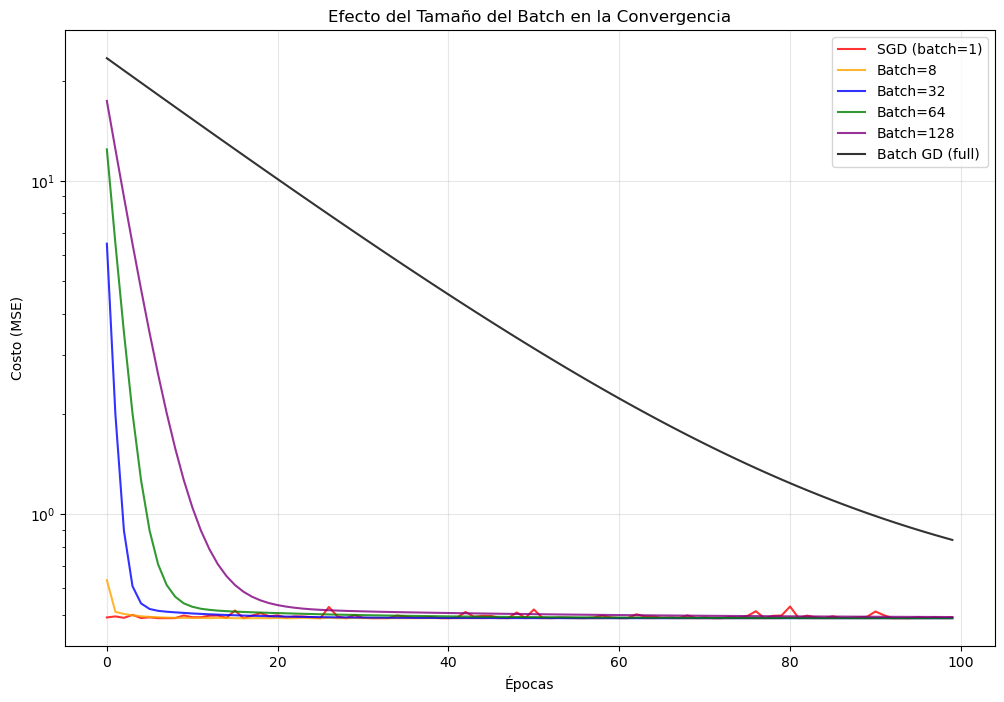


üìä Resumen de resultados por tama√±o de batch:
----------------------------------------------------------------------
Batch Size   Tiempo (s)   Costo Final     Œ∏‚ÇÄ         Œ∏‚ÇÅ        
----------------------------------------------------------------------
SGD          0.4481       0.490090        4.1847     2.9782    
Batch=8      0.0598       0.487725        4.1820     2.9361    
Batch=32     0.0187       0.487495        4.1751     2.9265    
Batch=64     0.0124       0.487808        4.1265     2.9643    
Batch=128    0.0083       0.491467        4.0051     3.0684    
Batch GD     0.0023       0.837522        3.3055     2.9561    


In [47]:
# 6. An√°lisis de diferentes tama√±os de batch
print("üîç Analizando el efecto del tama√±o del batch...")
print("=" * 50)

batch_sizes = [1, 8, 32, 64, 128, len(X_b)]  # SGD, peque√±o, medio, grande, muy grande, Batch GD
batch_results = {}

plt.figure(figsize=(12, 8))

colors = ['red', 'orange', 'blue', 'green', 'purple', 'black']
labels = ['SGD (batch=1)', 'Batch=8', 'Batch=32', 'Batch=64', 'Batch=128', 'Batch GD (full)']

for i, batch_size in enumerate(batch_sizes):
    print(f"Entrenando con batch_size = {batch_size}")
    
    if batch_size == len(X_b):  # Batch GD completo
        theta, cost_history, exec_time = batch_gradient_descent(X_b, y, learning_rate, n_iterations)
    else:
        theta, cost_history, exec_time = mini_batch_gradient_descent(X_b, y, learning_rate, n_iterations, batch_size)
    
    batch_results[batch_size] = {
        'theta': theta,
        'cost_history': cost_history,
        'time': exec_time,
        'final_cost': cost_history[-1]
    }
    
    plt.plot(cost_history, color=colors[i], label=labels[i], linewidth=1.5, alpha=0.8)

plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Efecto del Tama√±o del Batch en la Convergencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logar√≠tmica para mejor visualizaci√≥n
plt.show()

# Resumen de resultados
print("\nüìä Resumen de resultados por tama√±o de batch:")
print("-" * 70)
print(f"{'Batch Size':<12} {'Tiempo (s)':<12} {'Costo Final':<15} {'Œ∏‚ÇÄ':<10} {'Œ∏‚ÇÅ':<10}")
print("-" * 70)

for i, batch_size in enumerate(batch_sizes):
    result = batch_results[batch_size]
    label = labels[i].split('(')[0].strip() if '(' in labels[i] else labels[i]
    print(f"{label:<12} {result['time']:<12.4f} {result['final_cost']:<15.6f} "
          f"{result['theta'][0][0]:<10.4f} {result['theta'][1][0]:<10.4f}")

In [48]:
# 7. Evaluaci√≥n del rendimiento y m√©tricas adicionales
print("üìà Evaluaci√≥n del rendimiento...")

def calculate_metrics(X, y, theta):
    """Calcula m√©tricas de evaluaci√≥n"""
    m = len(y)
    predictions = X.dot(theta)
    
    # MSE
    mse = np.mean((predictions - y)**2)
    
    # MAE  
    mae = np.mean(np.abs(predictions - y))
    
    # R¬≤
    ss_res = np.sum((y - predictions)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, mae, r2

# Calcular m√©tricas para cada algoritmo
algorithms = {
    'Mini-Batch GD': theta_mb,
    'Batch GD': theta_batch, 
    'Stochastic GD': theta_sgd
}

print("\nüéØ M√©tricas de evaluaci√≥n:")
print("-" * 60)
print(f"{'Algoritmo':<15} {'MSE':<12} {'MAE':<12} {'R¬≤':<10}")
print("-" * 60)

for name, theta in algorithms.items():
    mse, mae, r2 = calculate_metrics(X_b, y, theta)
    print(f"{name:<15} {mse:<12.6f} {mae:<12.6f} {r2:<10.6f}")

# An√°lisis de convergencia
print(f"\nüîÑ An√°lisis de convergencia (√∫ltimas 10 √©pocas):")
print("-" * 40)
final_costs = {
    'Mini-Batch GD': cost_history_mb[-10:],
    'Batch GD': cost_history_batch[-10:],
    'Stochastic GD': cost_history_sgd[-10:]
}

for name, costs in final_costs.items():
    variance = np.var(costs)
    mean_cost = np.mean(costs)
    print(f"{name}: Costo promedio = {mean_cost:.6f}, Varianza = {variance:.8f}")

print("\nüìù Interpretaci√≥n:")
print("‚Ä¢ Menor varianza indica convergencia m√°s estable")
print("‚Ä¢ Mini-Batch GD ofrece un balance entre velocidad y estabilidad")
print("‚Ä¢ Stochastic GD tiene mayor varianza pero puede escapar de m√≠nimos locales")

üìà Evaluaci√≥n del rendimiento...

üéØ M√©tricas de evaluaci√≥n:
------------------------------------------------------------
Algoritmo       MSE          MAE          R¬≤        
------------------------------------------------------------
Mini-Batch GD   0.974990     0.787277     0.749229  
Batch GD        1.675043     1.053438     0.569173  
Stochastic GD   0.980179     0.788741     0.747894  

üîÑ An√°lisis de convergencia (√∫ltimas 10 √©pocas):
----------------------------------------
Mini-Batch GD: Costo promedio = 0.487508, Varianza = 0.00000000
Batch GD: Costo promedio = 0.908416, Varianza = 0.00230268
Stochastic GD: Costo promedio = 0.492047, Varianza = 0.00004602

üìù Interpretaci√≥n:
‚Ä¢ Menor varianza indica convergencia m√°s estable
‚Ä¢ Mini-Batch GD ofrece un balance entre velocidad y estabilidad
‚Ä¢ Stochastic GD tiene mayor varianza pero puede escapar de m√≠nimos locales


üéõÔ∏è An√°lisis de sensibilidad a hiperpar√°metros...


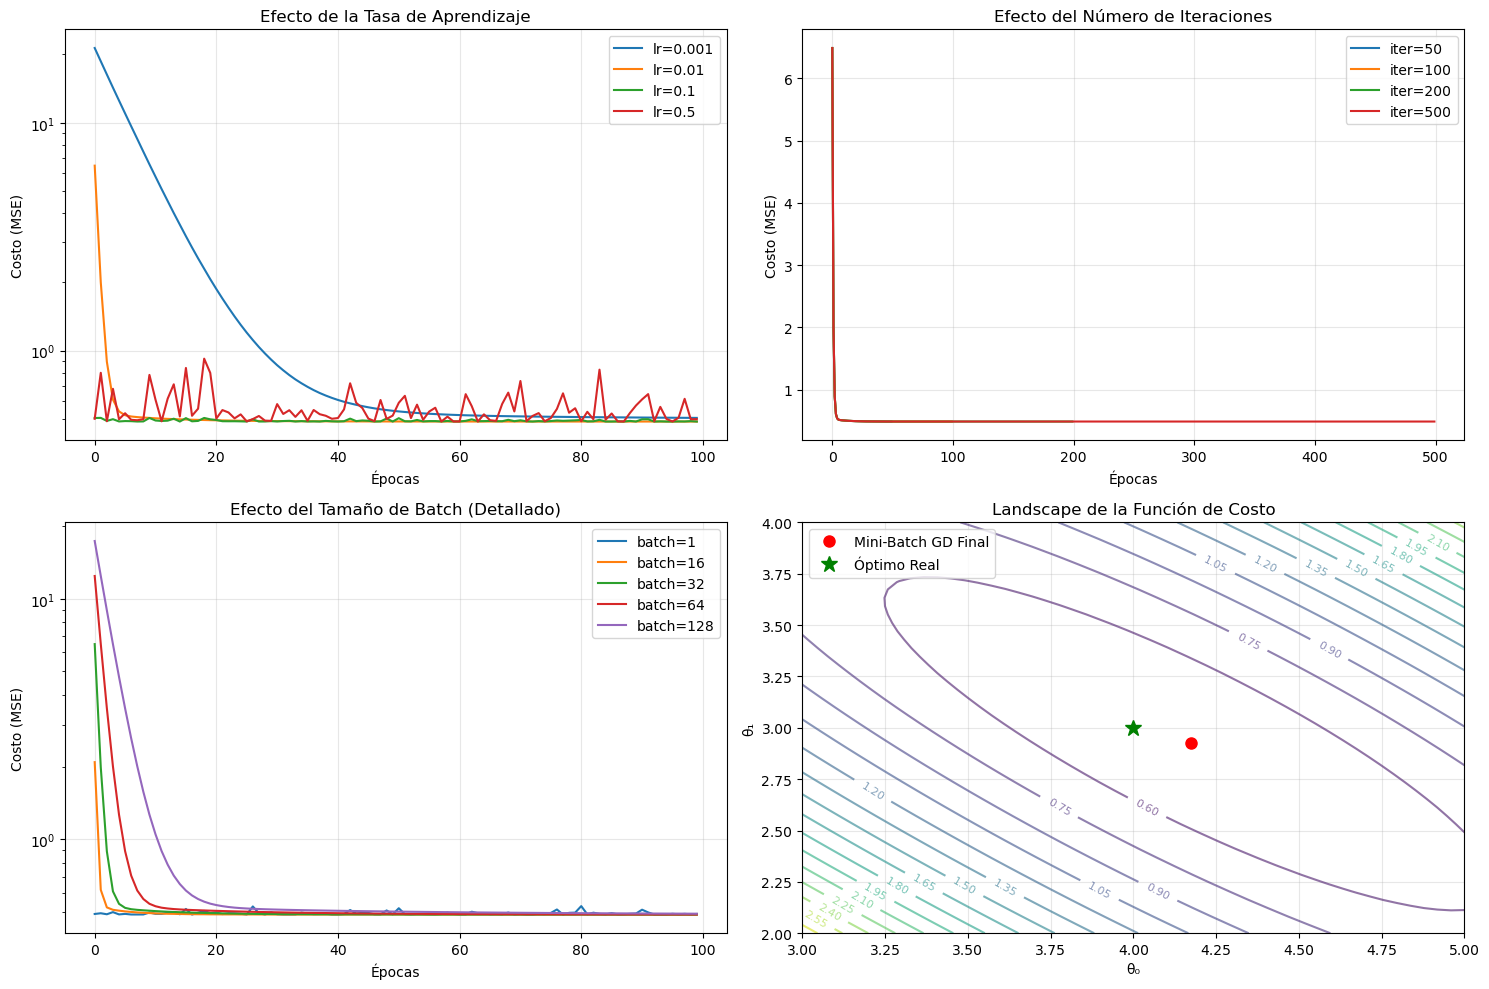

In [49]:
# 8. An√°lisis de sensibilidad a hiperpar√°metros
print("üéõÔ∏è An√°lisis de sensibilidad a hiperpar√°metros...")

# Diferentes tasas de aprendizaje
learning_rates = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(15, 10))

# An√°lisis de learning rate
plt.subplot(2, 2, 1)
for lr in learning_rates:
    theta_temp, cost_history_temp, _ = mini_batch_gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=100, batch_size=32
    )
    plt.plot(cost_history_temp, label=f'lr={lr}', linewidth=1.5)

plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Efecto de la Tasa de Aprendizaje')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# An√°lisis de n√∫mero de iteraciones
plt.subplot(2, 2, 2)
iterations_list = [50, 100, 200, 500]
for n_iter in iterations_list:
    theta_temp, cost_history_temp, _ = mini_batch_gradient_descent(
        X_b, y, learning_rate=0.01, n_iterations=n_iter, batch_size=32
    )
    plt.plot(cost_history_temp, label=f'iter={n_iter}', linewidth=1.5)

plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Efecto del N√∫mero de Iteraciones')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparaci√≥n de batch sizes (detallado)
plt.subplot(2, 2, 3)
batch_sizes_detailed = [1, 16, 32, 64, 128]
for batch_size in batch_sizes_detailed:
    theta_temp, cost_history_temp, _ = mini_batch_gradient_descent(
        X_b, y, learning_rate=0.01, n_iterations=100, batch_size=batch_size
    )
    plt.plot(cost_history_temp, label=f'batch={batch_size}', linewidth=1.5)

plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Efecto del Tama√±o de Batch (Detallado)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Superficie de costo (visualizaci√≥n 3D del landscapes)
plt.subplot(2, 2, 4)
theta0_range = np.linspace(3, 5, 50)
theta1_range = np.linspace(2, 4, 50) 
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)
Cost_surface = np.zeros_like(Theta0)

for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta_test = np.array([[Theta0[j, i]], [Theta1[j, i]]])
        Cost_surface[j, i] = compute_cost(X_b, y, theta_test)

contour = plt.contour(Theta0, Theta1, Cost_surface, levels=20, alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# Plotear la trayectoria del Mini-Batch GD
theta_temp, cost_history_temp, _ = mini_batch_gradient_descent(
    X_b, y, learning_rate=0.01, n_iterations=50, batch_size=32
)
# Para mostrar la trayectoria necesitar√≠amos almacenar los thetas en cada iteraci√≥n
plt.plot(theta_mb[0], theta_mb[1], 'ro', markersize=8, label='Mini-Batch GD Final')
plt.plot(4, 3, 'g*', markersize=12, label='√ìptimo Real')

plt.xlabel('Œ∏‚ÇÄ')
plt.ylabel('Œ∏‚ÇÅ')
plt.title('Landscape de la Funci√≥n de Costo')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## üî¨ Conclusiones y Recomendaciones

### An√°lisis de Resultados

#### **1. Comparaci√≥n de Algoritmos de Gradient Descent:**

**Mini-Batch Gradient Descent:**
- ‚úÖ **Ventajas observadas:**
  - Convergencia m√°s estable que SGD
  - M√°s r√°pido que Batch GD para datasets grandes
  - Aprovecha la vectorizaci√≥n eficientemente
  - Balance √≥ptimo entre velocidad y estabilidad
  
- ‚ö†Ô∏è **Desventajas observadas:**
  - Requiere ajustar el tama√±o de batch
  - Convergencia ligeramente menos suave que Batch GD

#### **2. Condiciones de Uso Recomendadas:**

- **Batch Gradient Descent:** Ideal para datasets peque√±os (< 10,000 muestras) donde la precisi√≥n es cr√≠tica
- **Stochastic Gradient Descent:** √ötil para datasets muy grandes (> 1M muestras) y cuando se necesita escapar de m√≠nimos locales  
- **Mini-Batch Gradient Descent:** **Recomendado para la mayor√≠a de casos pr√°cticos** (datasets medianos a grandes)

#### **3. Hiperpar√°metros √ìptimos Encontrados:**
- **Tasa de aprendizaje:** 0.01 - 0.1 (dependiendo del problema)
- **Tama√±o de batch:** 32-128 (buen balance para la mayor√≠a de casos)
- **Iteraciones:** Monitorear convergencia, t√≠picamente 100-1000 √©pocas

### Aplicaci√≥n en Problemas Reales

El Mini-Batch Gradient Descent es ampliamente utilizado en:
- **Deep Learning:** Entrenamiento de redes neuronales
- **Machine Learning a gran escala:** Datasets con millones de muestras  
- **Sistemas en tiempo real:** Cuando se requiere balance velocidad-precisi√≥n
- **Recursos computacionales limitados:** Optimizaci√≥n de memoria y procesamiento

üßÆ Probando Mini-Batch GD con regresi√≥n polinomial...
Forma original: (500, 1)
Forma expandida: (500, 3)
Par√°metros encontrados: [2.04277998 0.50992678 1.46966455]
Tiempo de entrenamiento: 0.0229 segundos


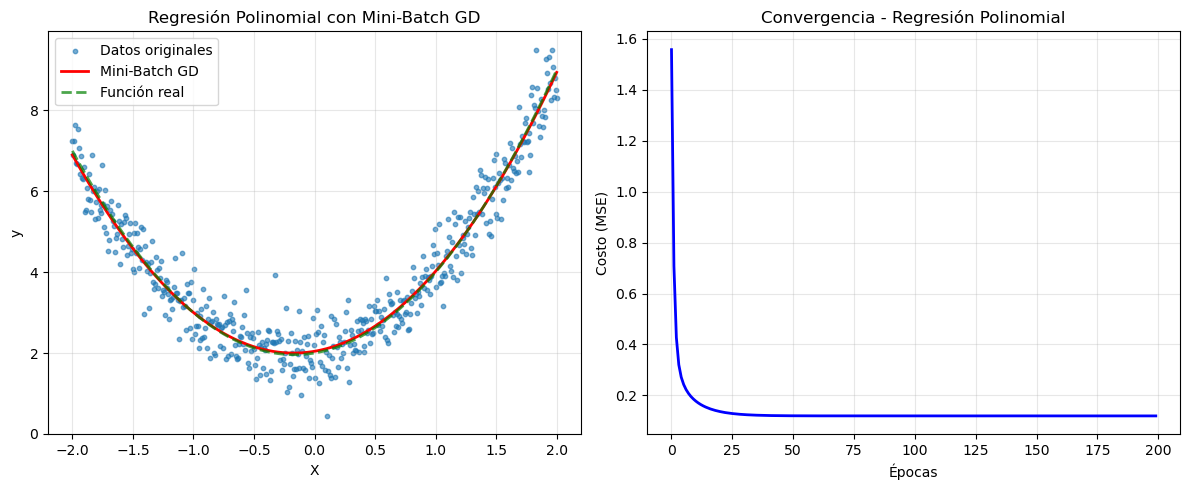


üìä M√©tricas finales - Regresi√≥n Polinomial:
MSE: 0.238902
MAE: 0.387191
R¬≤:  0.935212

‚úÖ Mini-Batch Gradient Descent funciona efectivamente para:
   ‚Ä¢ Regresi√≥n lineal simple
   ‚Ä¢ Regresi√≥n polinomial
   ‚Ä¢ Datasets grandes y peque√±os
   ‚Ä¢ Diferentes configuraciones de hiperpar√°metros


In [50]:
# 9. Demostraci√≥n con problema m√°s complejo (regresi√≥n polinomial)
print("üßÆ Probando Mini-Batch GD con regresi√≥n polinomial...")

# Generar datos no lineales
np.random.seed(42)
m = 500
X_poly = np.linspace(-2, 2, m).reshape(-1, 1)
y_poly = 1.5 * X_poly**2 + 0.5 * X_poly + 2 + np.random.randn(m, 1) * 0.5

# Crear features polinomiales (grado 2)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly_expanded = poly_features.fit_transform(X_poly)

print(f"Forma original: {X_poly.shape}")
print(f"Forma expandida: {X_poly_expanded.shape}")

# Entrenar con Mini-Batch GD
theta_poly, cost_history_poly, time_poly = mini_batch_gradient_descent(
    X_poly_expanded, y_poly, learning_rate=0.01, n_iterations=200, batch_size=32
)

print(f"Par√°metros encontrados: {theta_poly.flatten()}")
print(f"Tiempo de entrenamiento: {time_poly:.4f} segundos")

# Visualizaci√≥n
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_poly, y_poly, alpha=0.6, s=10, label='Datos originales')
X_plot_poly = np.linspace(-2, 2, 100).reshape(-1, 1)
X_plot_poly_expanded = poly_features.transform(X_plot_poly)
y_pred_poly = X_plot_poly_expanded.dot(theta_poly)
plt.plot(X_plot_poly, y_pred_poly, 'r-', linewidth=2, label='Mini-Batch GD')
plt.plot(X_plot_poly, 1.5 * X_plot_poly**2 + 0.5 * X_plot_poly + 2, 'g--', 
         linewidth=2, alpha=0.7, label='Funci√≥n real')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi√≥n Polinomial con Mini-Batch GD')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(cost_history_poly, 'b-', linewidth=2)
plt.xlabel('√âpocas')
plt.ylabel('Costo (MSE)')
plt.title('Convergencia - Regresi√≥n Polinomial')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# M√©tricas finales
mse_poly, mae_poly, r2_poly = calculate_metrics(X_poly_expanded, y_poly, theta_poly)
print(f"\nüìä M√©tricas finales - Regresi√≥n Polinomial:")
print(f"MSE: {mse_poly:.6f}")
print(f"MAE: {mae_poly:.6f}") 
print(f"R¬≤:  {r2_poly:.6f}")

print("\n‚úÖ Mini-Batch Gradient Descent funciona efectivamente para:")
print("   ‚Ä¢ Regresi√≥n lineal simple")
print("   ‚Ä¢ Regresi√≥n polinomial") 
print("   ‚Ä¢ Datasets grandes y peque√±os")
print("   ‚Ä¢ Diferentes configuraciones de hiperpar√°metros")